# More Trend Forecast Tests
### Andrew Attilio
### 10.15.2024



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
from src.utils import paths


def plot_beta_forecast(pmcmc_data_file_path, ensemble_file_path):
    """
    Plots the beta forecast results.
    """
    date_str = path.basename(path.dirname(pmcmc_data_file_path))
    loc_str = path.splitext(path.basename(pmcmc_data_file_path))[0]

    beta_df = pd.read_csv(pmcmc_data_file_path)
    ensemble_df = pd.read_csv(ensemble_file_path)

    # Renaming columns for consistency
    beta_df["time_1"] = beta_df["time_0"] + 1
    beta_df.rename(columns={"time_1": "Day", "beta": "Beta"}, inplace=True)

    combined_df = pd.concat([beta_df, ensemble_df], ignore_index=True, sort=False)

    # Get the last beta value
    last_beta_day = beta_df["Day"].max()
    last_beta_value = beta_df.loc[beta_df["Day"] == last_beta_day, "Beta"].values[0]

    # Add the last beta value as the first point in ensemble_df for a smooth connection
    first_forecast_day = last_beta_day + 1
    ensemble_df = pd.concat(
        [
            pd.DataFrame(
                {
                    "Day": [last_beta_day],
                    "Mean": [last_beta_value],
                    "Lower": [last_beta_value],
                    "Upper": [last_beta_value],
                }
            ),
            ensemble_df,
        ],
        ignore_index=True,
    )

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.lineplot(
        x="Day", y="Beta", data=beta_df, label="PMCMC Beta Estimation", color="blue"
    )
    sns.lineplot(
        x="Day",
        y="Mean",
        data=ensemble_df,
        label="Ensemble Mean Forecast",
        color="orange",
    )
    plt.fill_between(
        ensemble_df["Day"],
        ensemble_df["Lower"],
        ensemble_df["Upper"],
        color="gray",
        alpha=0.3,
        label="95% Prediction Interval",
    )

    # Add vertical dotted line at the prediction date
    prediction_day = beta_df["Day"].max()
    plt.axvline(
        x=prediction_day,
        color="black",
        linestyle="--",
        label=f"Prediction Start: {date_str}",
    )

    plt.title(f"Beta Ensemble Forecast for Loc {loc_str}: {date_str}")
    plt.xlabel("Day")
    plt.ylabel("Beta Value")
    plt.legend()

    plt.show()

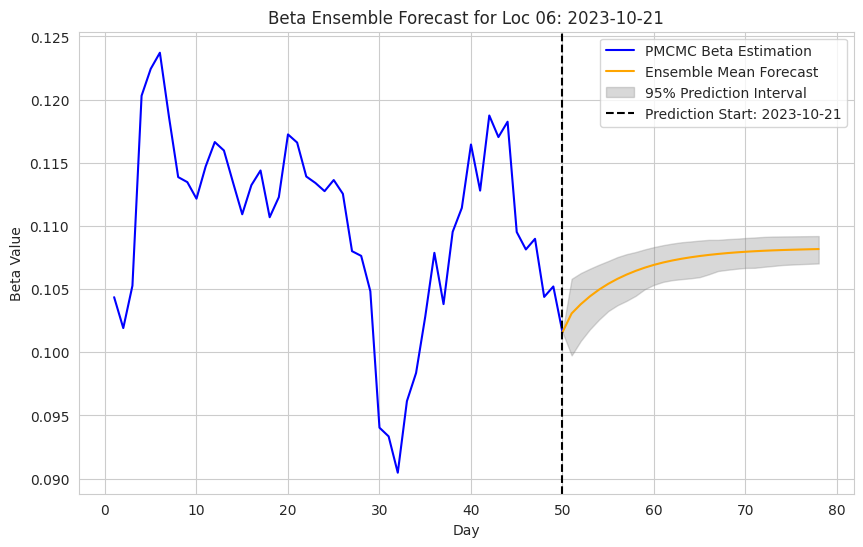

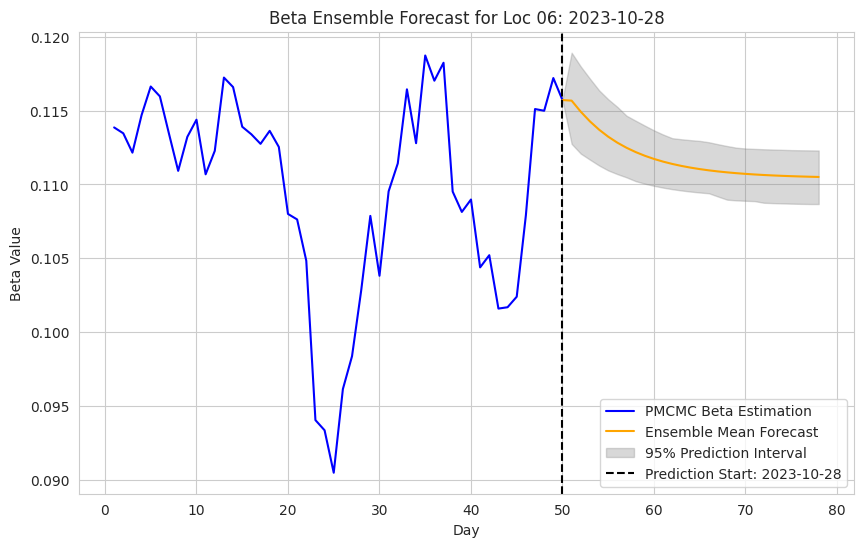

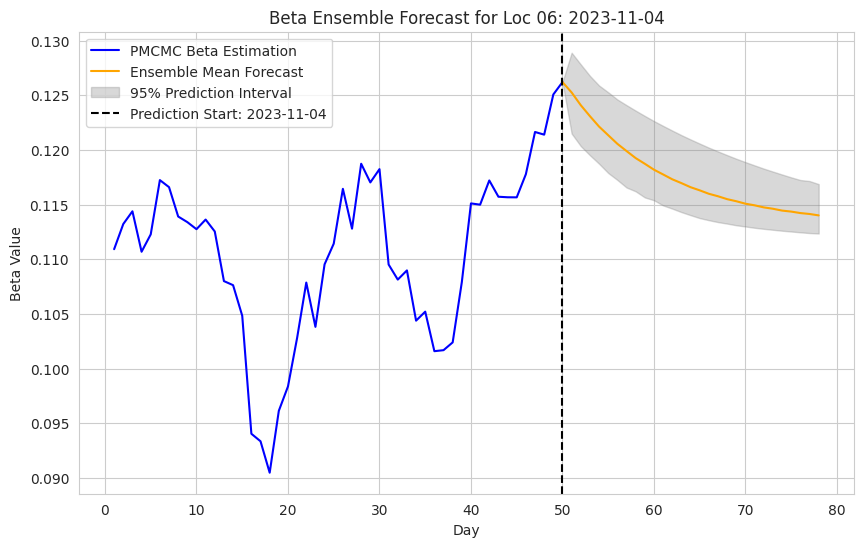

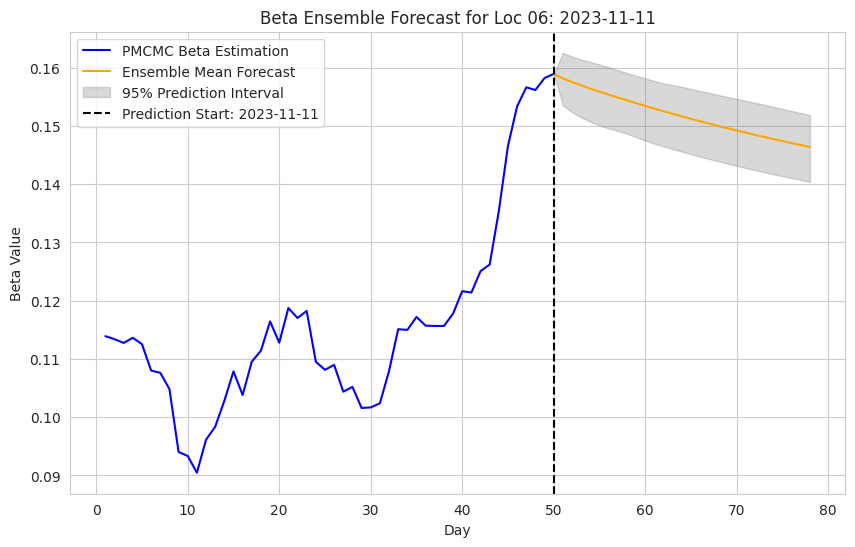

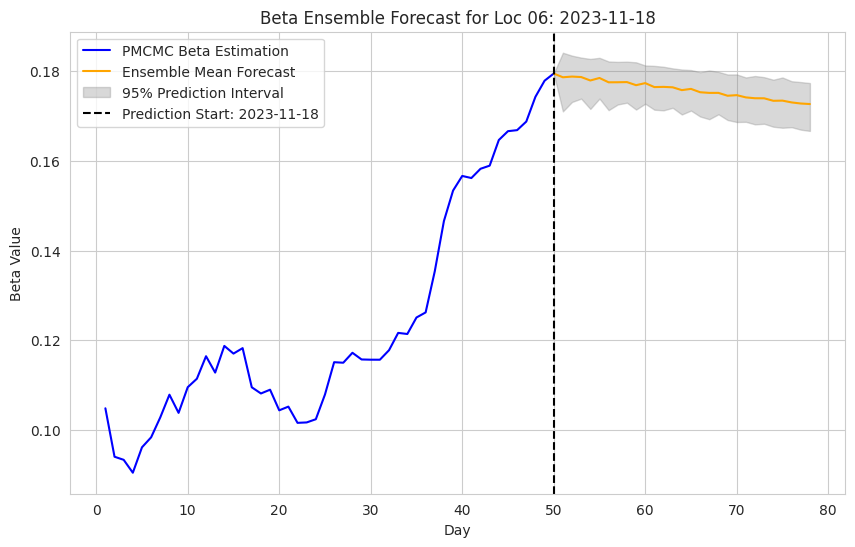

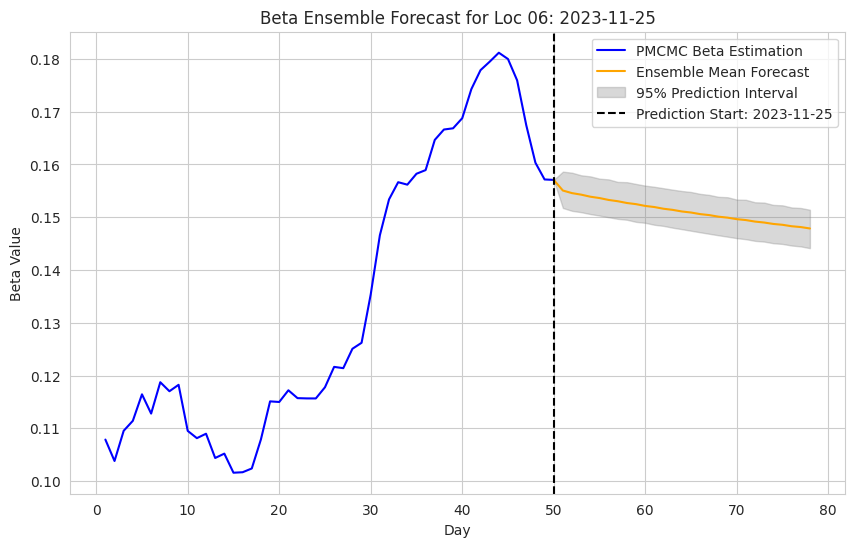

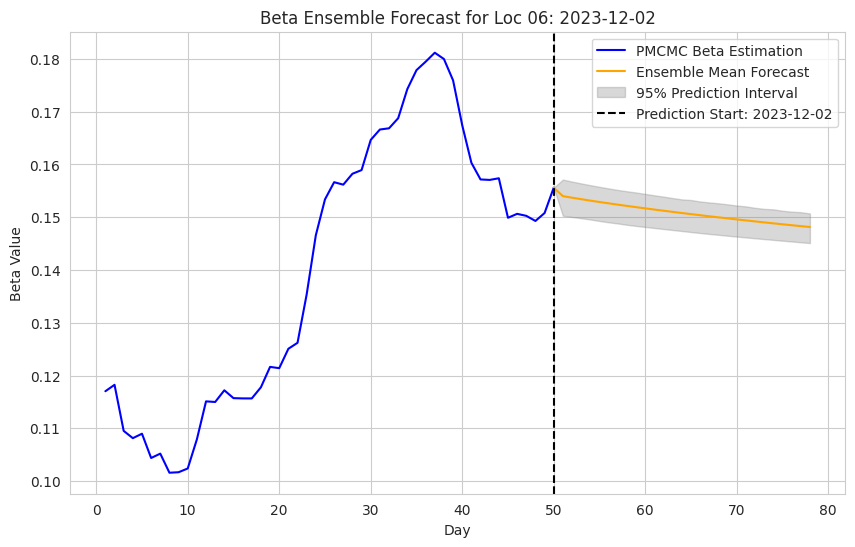

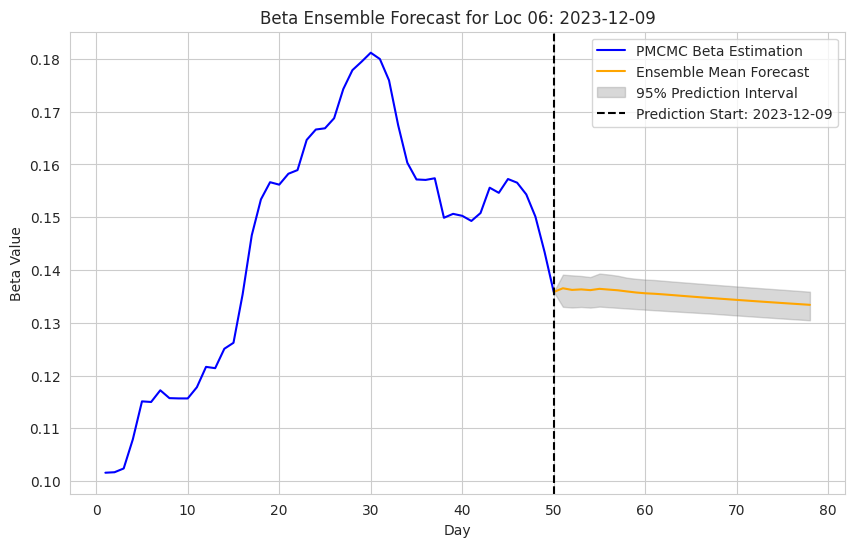

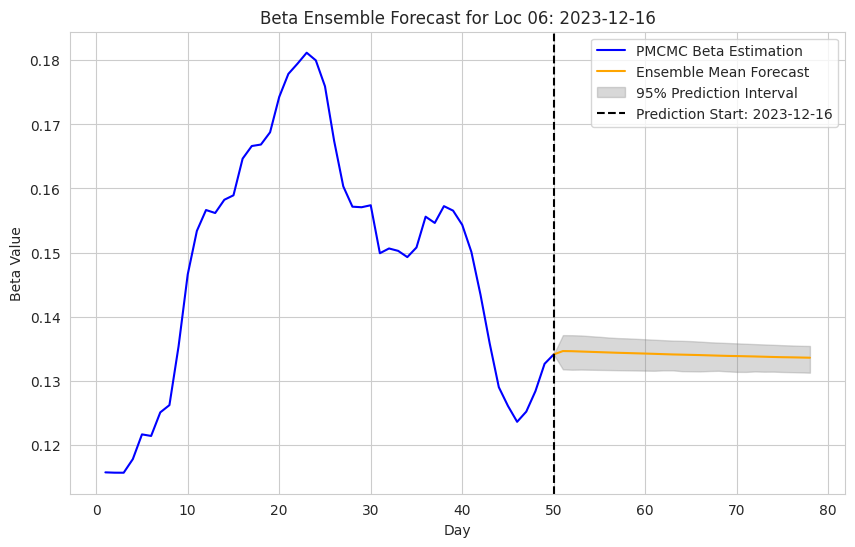

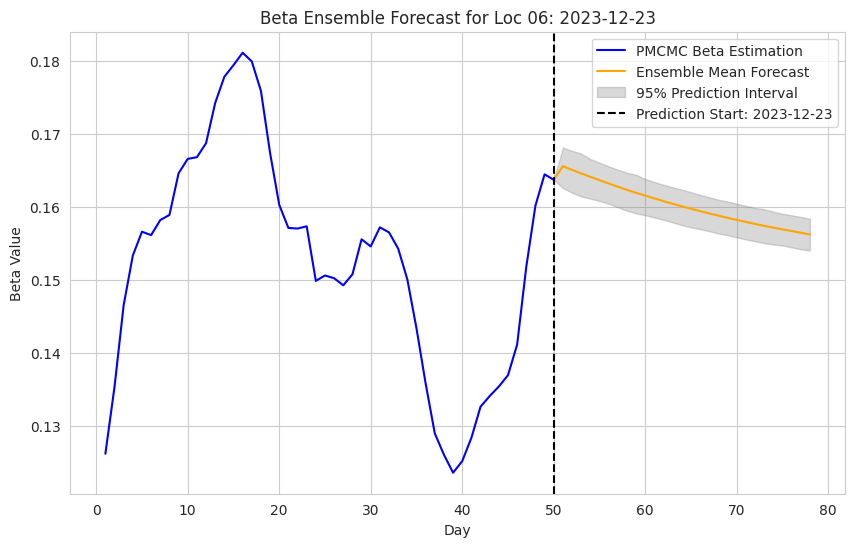

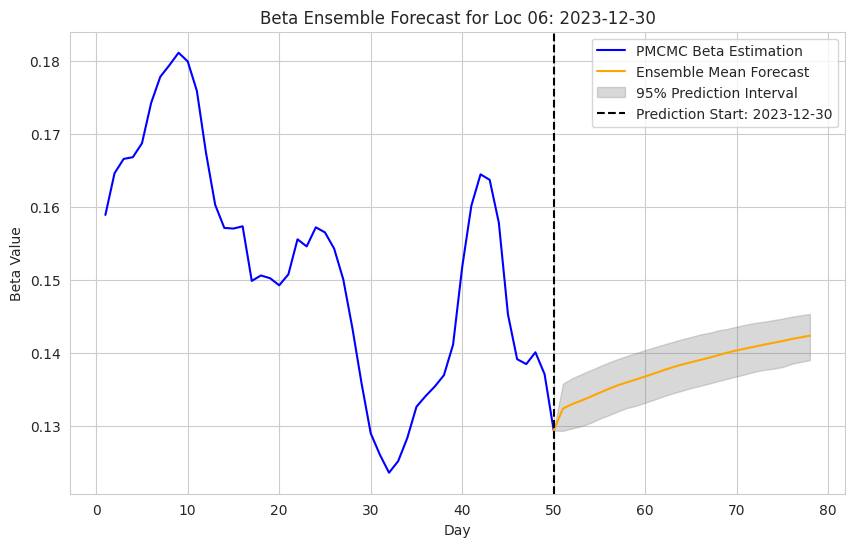

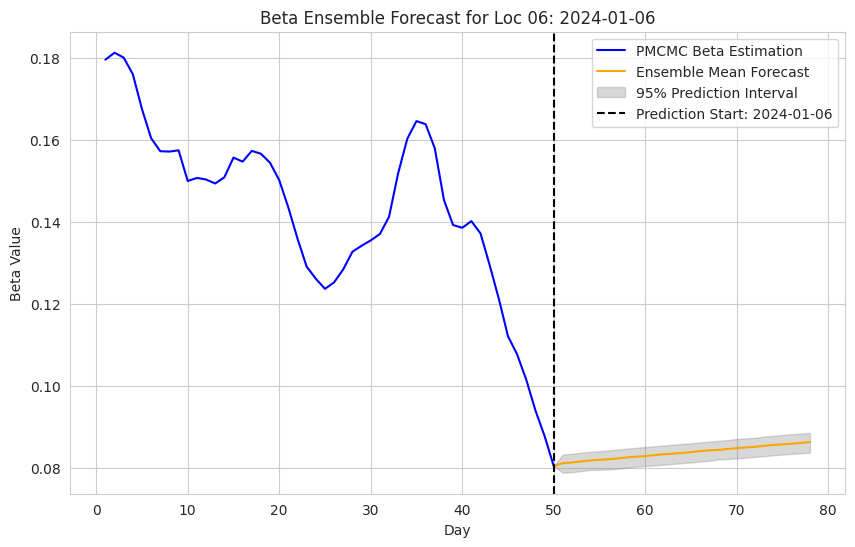

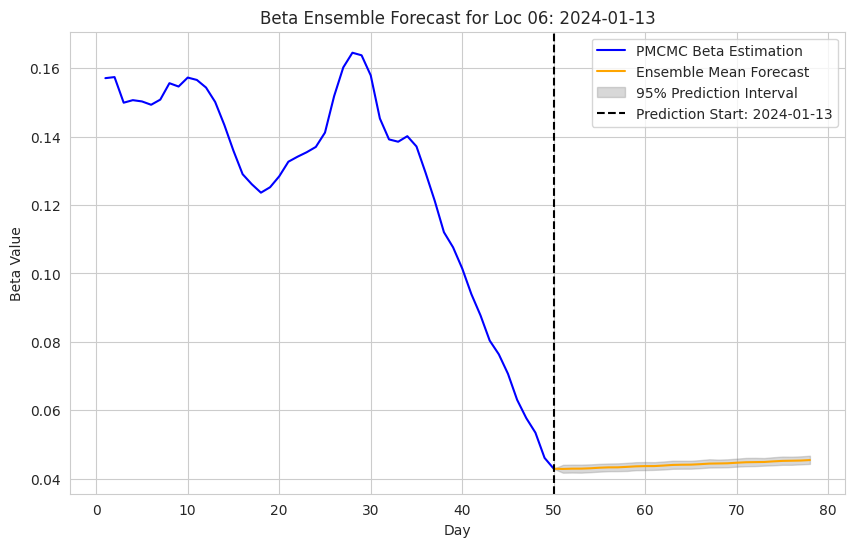

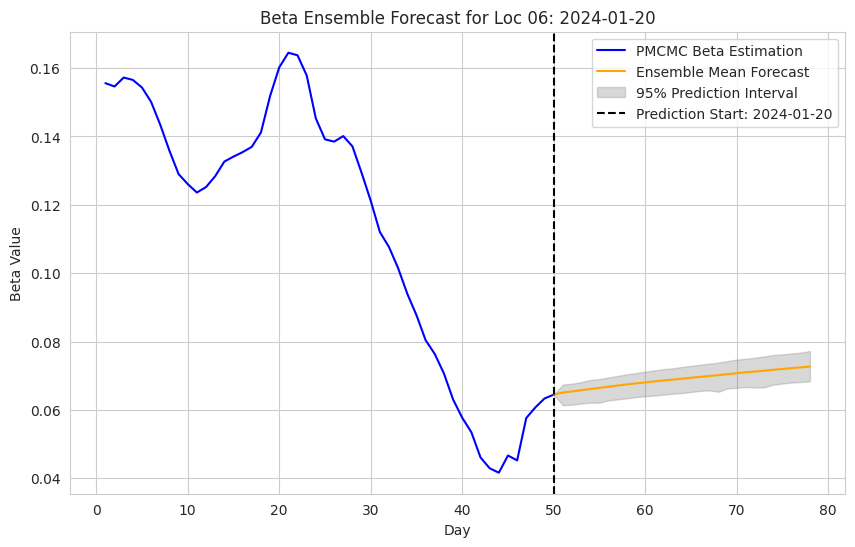

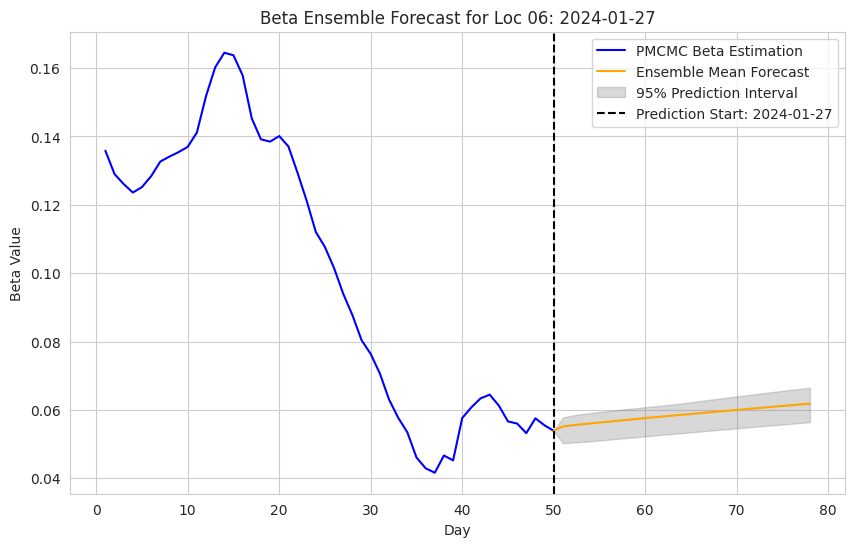

File not found: /home/andrew/PycharmProjects/pmcmc_forecast/output/06_trend_test/2024-02-03/06/ensemble_forecast.csv
File not found: /home/andrew/PycharmProjects/pmcmc_forecast/output/06_trend_test/2024-02-10/06/ensemble_forecast.csv


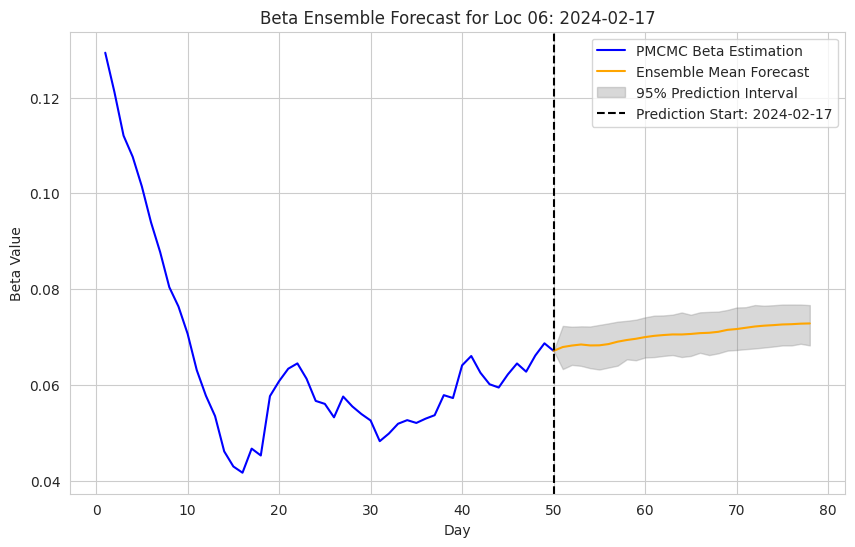

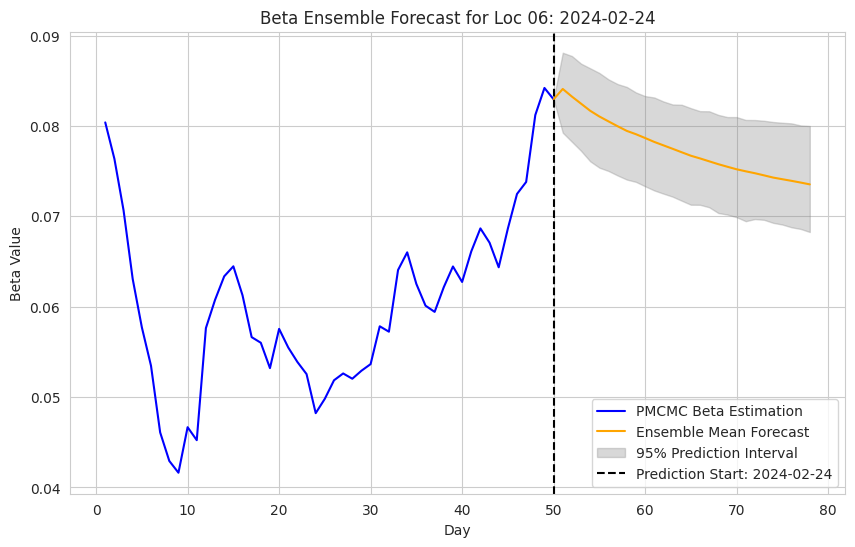

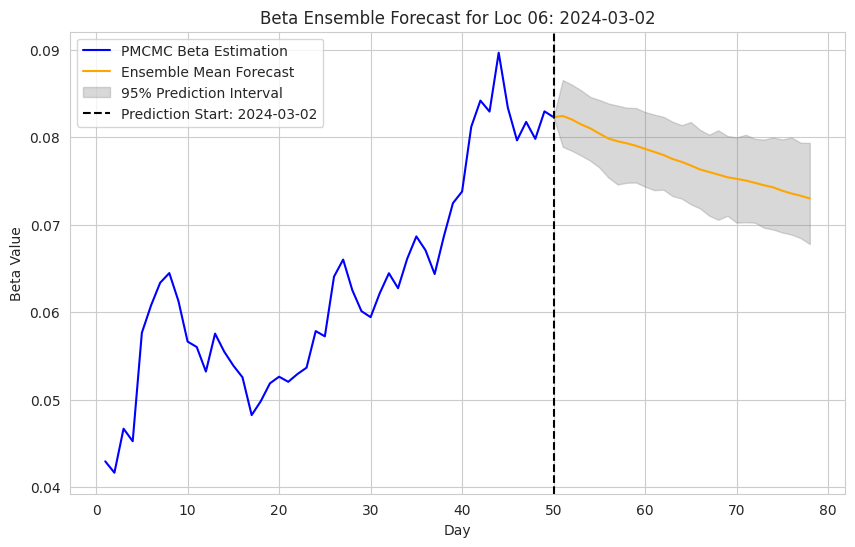

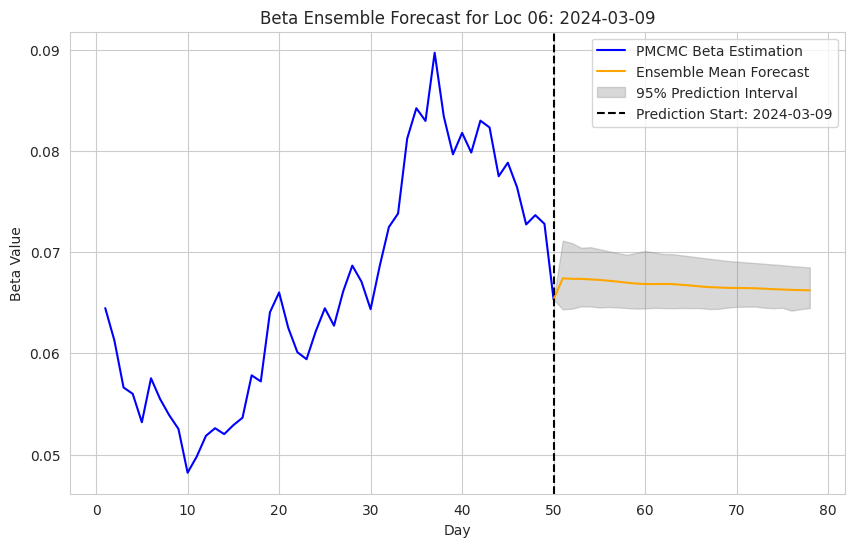

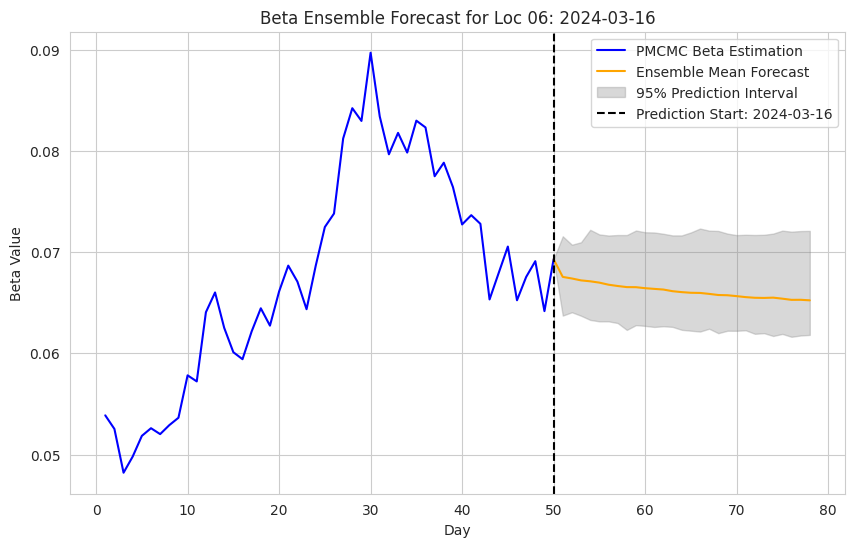

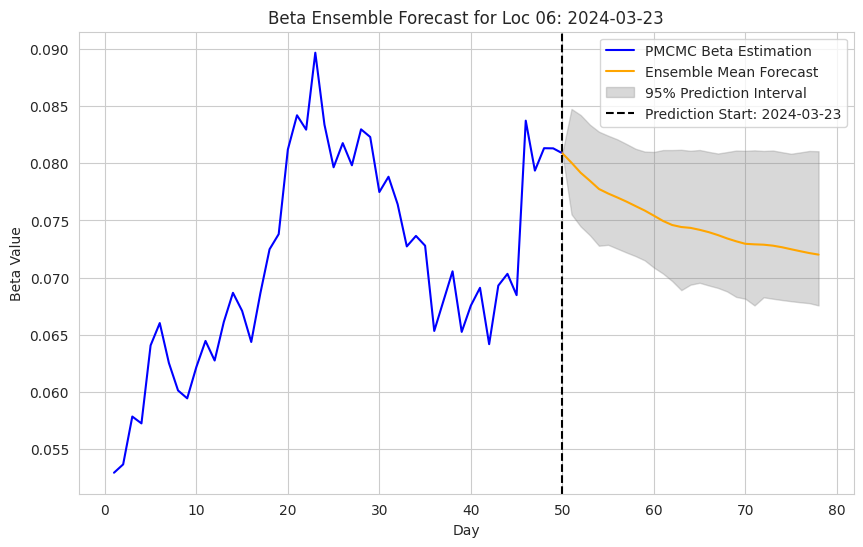

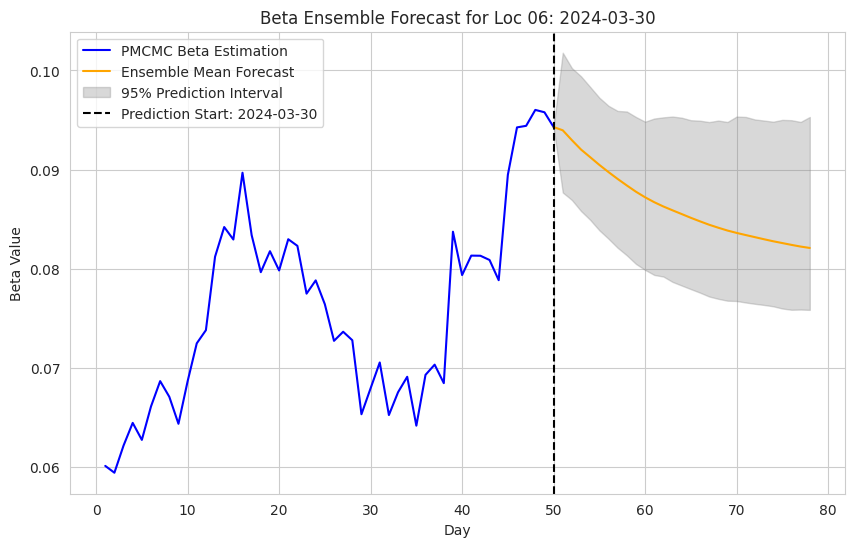

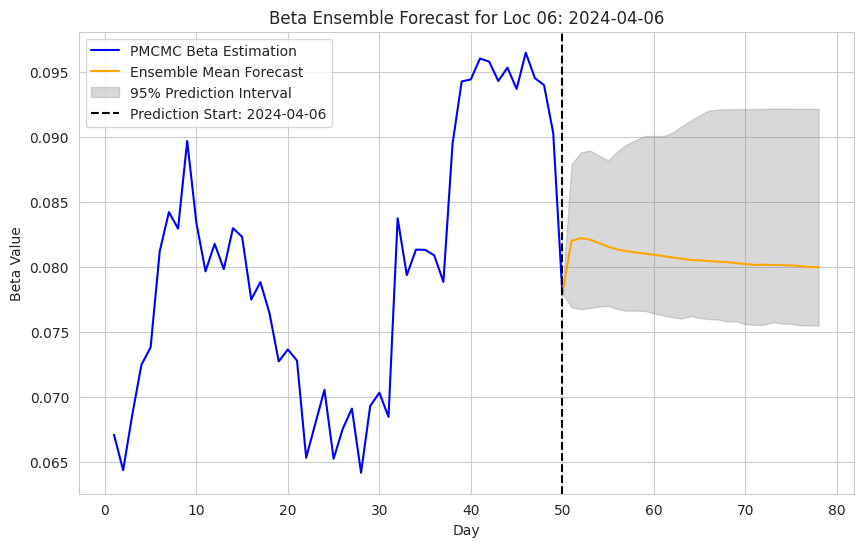

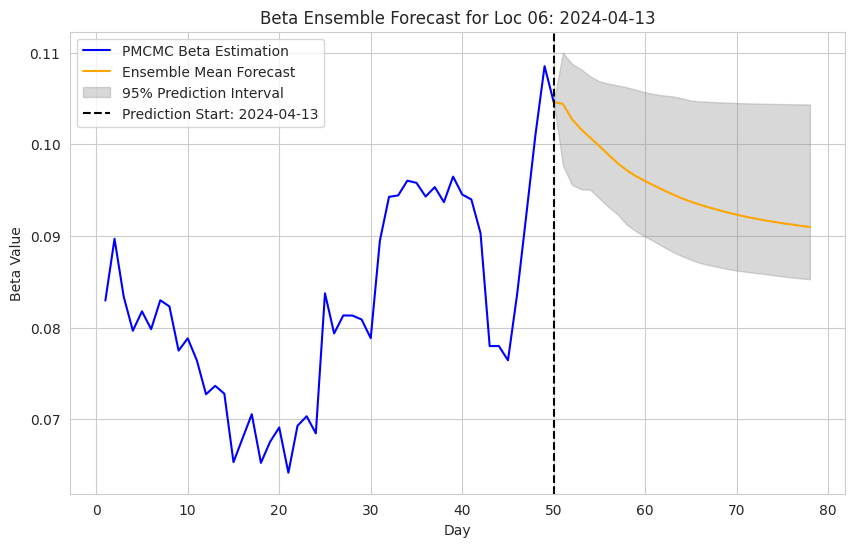

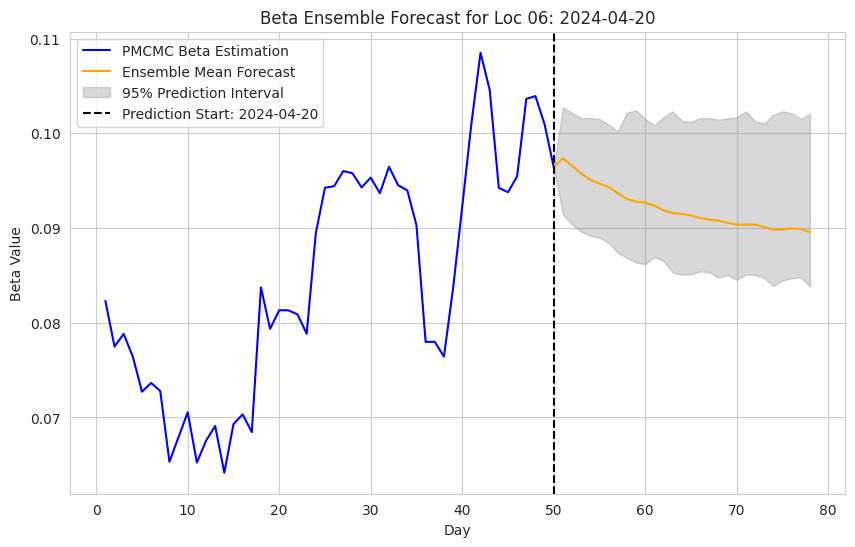

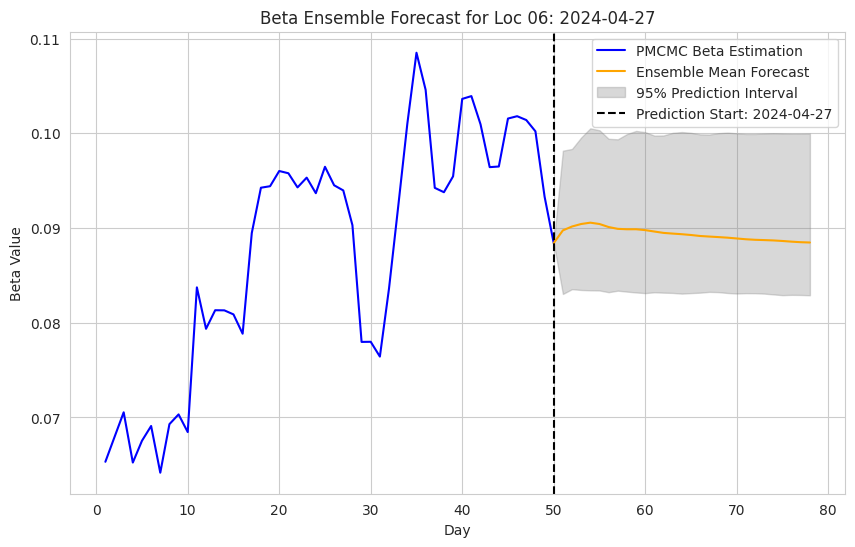

In [7]:
import os

# Plot all data from this test run
for date_folder in os.listdir(os.path.join(paths.OUTPUT_DIR, "06_trend_test")):
    date_path = os.path.join(paths.OUTPUT_DIR, "06_trend_test", date_folder, "06")

    # Check if it is a directory
    if os.path.isdir(date_path):
        ensemble_file = os.path.join(date_path, "ensemble_forecast.csv")

        if os.path.isfile(ensemble_file):
            pmcmc_file_path = os.path.join(paths.PF_OUTPUT_DIR, date_folder, "06.csv")
            plot_beta_forecast(pmcmc_file_path, ensemble_file)
        else:
            print(f"File not found: {ensemble_file}")